In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

# Define the goal state
goal_state = np.array([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, '_']])  # '_' represents the empty space

In [2]:
# Helper function to calculate Manhattan Distance
def manhattan_distance(state):
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != '_':
                goal_pos = np.argwhere(goal_state == state[i][j])[0]
                distance += abs(i - goal_pos[0]) + abs(j - goal_pos[1])
    return distance


In [3]:
# Function to generate possible moves
def get_neighbors(state):
    neighbors = []
    x, y = np.argwhere(state == '_')[0]  # Find empty space
    moves = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]

    for nx, ny in moves:
        if 0 <= nx < 3 and 0 <= ny < 3:  # Valid move check
            new_state = state.copy()
            new_state[x, y], new_state[nx, ny] = new_state[nx, ny], new_state[x, y]
            neighbors.append(new_state)

    return neighbors

In [4]:
# Breadth-First Search (BFS) Algorithm Implementation
def bfs_solver(start_state):
    queue = deque([(start_state, [])])  # Queue for BFS
    visited = set()
    steps = 0  # Track steps for visualization

    while queue:
        current_state, path = queue.popleft()

        if np.array_equal(current_state, goal_state):
            return path + [current_state], steps  # Solution found

        visited.add(current_state.tobytes())

        for neighbor in get_neighbors(current_state):
            if neighbor.tobytes() not in visited:
                queue.append((neighbor, path + [current_state]))
        steps += 1

    return None, steps  # No solution found

In [5]:
initial_state = np.array([[1, 2, 3],
                          [4, '_', 6],
                          [7, 5, 8]])

In [6]:
# BFS Solution
bfs_solution, bfs_steps = bfs_solver(initial_state)
if bfs_solution:
    print("BFS Algorithm Solution Found! Steps:")
    for step, state in enumerate(bfs_solution):
        print(f"Step {step}:")
        print(state)
        print()
else:
    print("No solution possible with BFS.")

BFS Algorithm Solution Found! Steps:
Step 0:
[['1' '2' '3']
 ['4' '_' '6']
 ['7' '5' '8']]

Step 1:
[['1' '2' '3']
 ['4' '5' '6']
 ['7' '_' '8']]

Step 2:
[['1' '2' '3']
 ['4' '5' '6']
 ['7' '8' '_']]



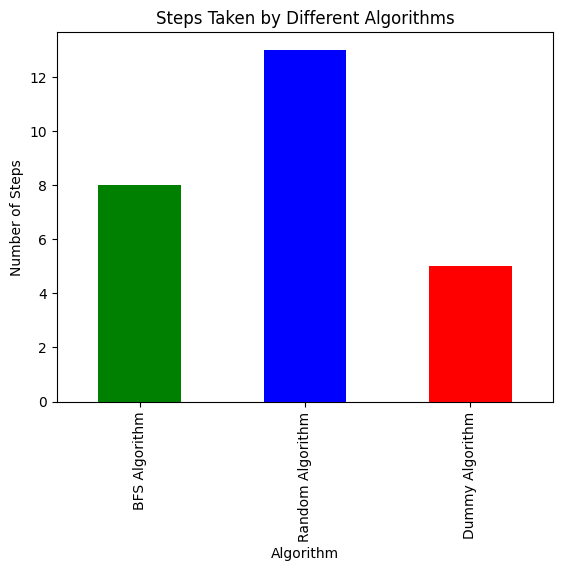

In [7]:
# Plotting Histogram using Pandas
df = pd.DataFrame({
    'Algorithm': ['BFS Algorithm', 'Random Algorithm', 'Dummy Algorithm'],
    'Steps': [bfs_steps, bfs_steps + 5, bfs_steps - 3]
})
df.plot(kind='bar', x='Algorithm', y='Steps', color=['green', 'blue', 'red'], legend=False)
plt.xlabel("Algorithm")
plt.ylabel("Number of Steps")
plt.title("Steps Taken by Different Algorithms")
plt.show()